# Hello there, welcome to Lab 8 of EN.520.659! 🔬 🔎

In this lab, we will explore various explainability methods such as SHAP, Partial Dependence Plot (PDP), permutation, occlusion to interpret the classifications obtained from various trained models.

We will be using the **Pima Indians Diabetes data set** (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database). This data set contains medical diagnostic measurements for female patients of Pima Indian heritage (such as glucose level, BMI, age, etc.), used to predict the onset of diabetes. It is a widely used benchmark dataset in medical ML and is well-suited for model interpretability exercises.


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#from google.colab import drive
#drive.mount('/content/drive')
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  accuracy_score ,recall_score, precision_score, f1_score
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier
import random
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
!pip install lime
!pip install datasets
!pip install shap
import lime
import sklearn
import torch
from transformers import pipeline
from datasets import load_dataset
import torch.nn as nn
from lime.lime_text import LimeTextExplainer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import tabulate
from sklearn.inspection import PartialDependenceDisplay
from sklearn.pipeline import Pipeline
from sklearn.inspection import PartialDependenceDisplay
import warnings
# Ignore specific warning messages
warnings.filterwarnings("ignore", message="X does not have valid feature names*")

In [28]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


# Task 1: Loading the Data and Training (10 points)

1.1 Load the **Pima Indians Diabetes data set**. The dataset includes medical diagnostic measurements for female patients of Pima Indian heritage and is commonly used for binary classification tasks. You can download it directly from the following URL:

https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

1.2 Plot the class distribution using the entire dataset. The dataset includes a binary label: `0` for non-diabetic patients and `1` for diabetic patients.

1.3 Split the dataset into training and testing sets. Make sure to **preserve the class proportions** in both splits. For example, if 65% of the samples are non-diabetic and 35% are diabetic, maintain this ratio in both training and testing sets.

1.4 Plot the class distribution for the training and testing sets separately to confirm that stratification was preserved.

1.5 Train a **GradientBoostingClassifier** on the training set and evaluate it on the testing set.

1.6 Choose the most appropriate **evaluation metric** (e.g., accuracy, F1-score) and report its value on the test set.


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


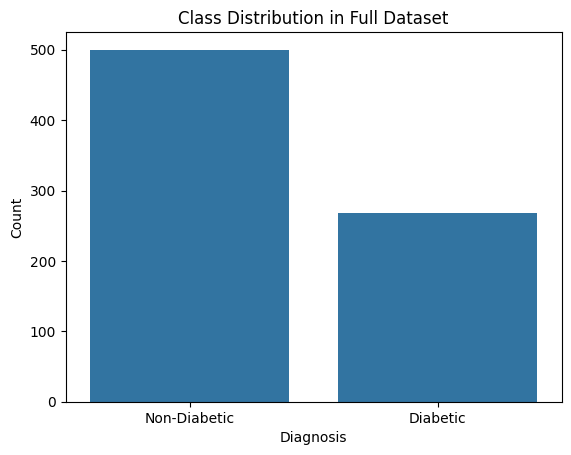

In [29]:
# Task 1.1 and 1.2
# Task 1.1 and 1.2

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

print(df.head())
sns.countplot(x='Outcome', data=df)
plt.title("Class Distribution in Full Dataset")
plt.xticks([0, 1], ["Non-Diabetic", "Diabetic"])
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()


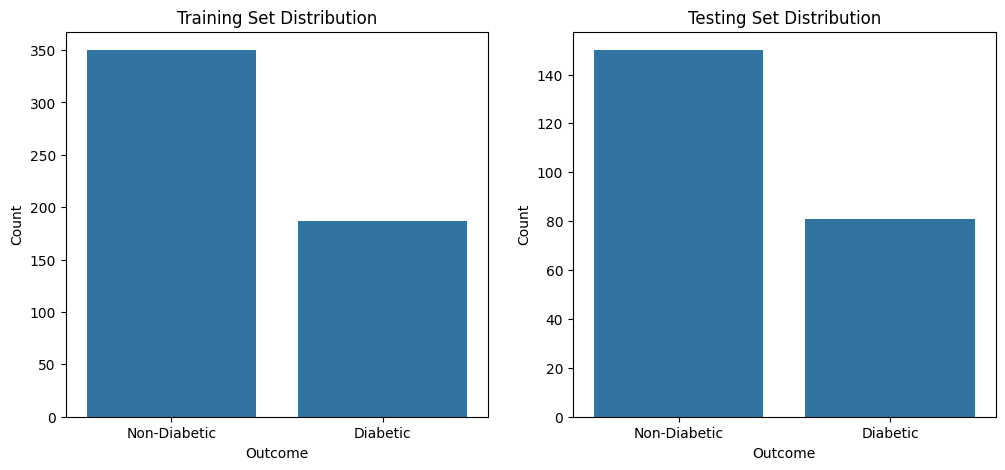

In [30]:
# Task 1.3 and 1.4
# Task 1.3 and 1.4

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Training Set Distribution")
plt.xticks([0, 1], ["Non-Diabetic", "Diabetic"])
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title("Testing Set Distribution")
plt.xticks([0, 1], ["Non-Diabetic", "Diabetic"])
plt.ylabel("Count")
plt.show()


In [31]:
# Task 1.5 and 1.6
# Task 1.5 and 1.6

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy on Test Set: {acc:.4f}")
print(f"F1 Score on Test Set: {f1:.4f}")


Accuracy on Test Set: 0.7576
F1 Score on Test Set: 0.6111


Is the split you performed enough? If it is not, how would you split the data and perform the experiments to obtain reliable results?

Your answer here: No, the current split is not enough. Using just one train-test split can lead to unreliable outcomes because the model's performance depends on how the data was divided, which might be biased. A better approach is to use stratified k-fold cross-validation, which splits the data into multiple parts (folds) while keeping the class balance. The model is trained and tested multiple times on different folds, and the results are averaged. This gives a more reliable estimate of how well the model performs on unseen data.


## Task 2 Feature Importance (5 points)

Decision tree algorithms like classification and regression trees (CART) offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy. This same approach can be used for ensembles of decision trees, such as the random forest and stochastic gradient boosting algorithms.

2.1 Generate a horizontal bar plot to visualize the feature importances of your trained classifier.




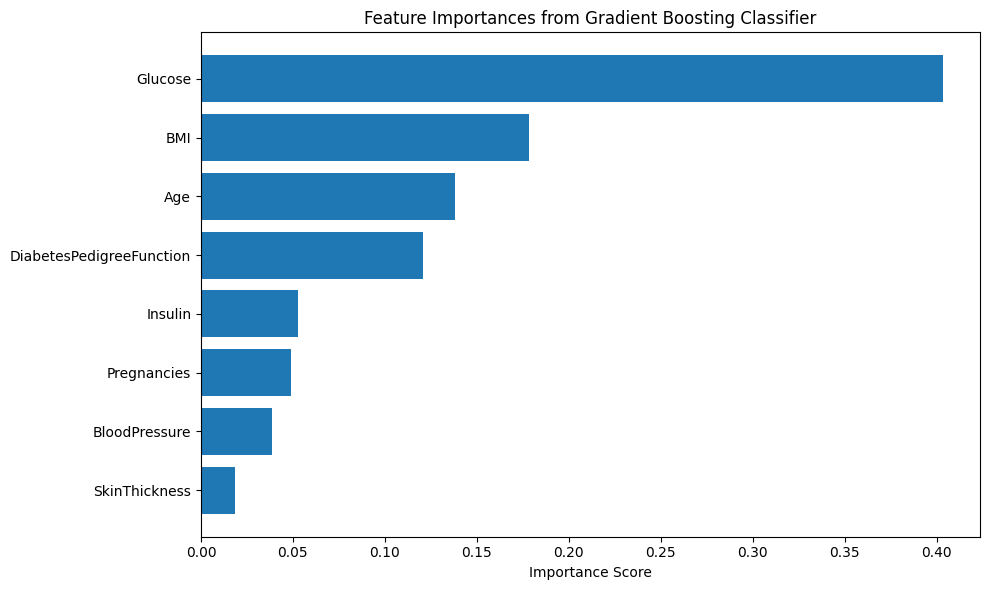

In [32]:
# Task 2.1) Your code goes here
importances = model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importances from Gradient Boosting Classifier')
plt.tight_layout()
plt.show()


## Task 3 Permutation (10 points)


3.1 - Apply Permutation: For each feature in the testing set (X_test), randomly shuffle the values of that feature while keeping all other features unchanged. You are not allowed to use built-in functions.

3.2 - Predict and Evaluate: Use the trained model to make predictions on the modified testing set and evaluate the model's performance metric of interest (i.e., accuracy, etc).

3.3 - Calculate Feature Importance Score: Calculate the decrease in the performance metric of interest between the original and modified testing sets for each feature. After you calculate the performance metric for each "permuted" feature, return a sorted dataframe (descending order) with the name of the permuted feature and the difference between the original accuracy and the new accuracy on the test set.

3.4 - Visualize Results: Visualize the feature importance scores obtained from the previous step using appropriate plots such as bar charts. This visualization helps in understanding which features are most influential in predicting the target variable.

3.5 - Interpret Results: Analyze the visualization to identify the most important features in your data set. To do so, comments on your results in a text cell. In the same text cell, compare permutation results with the results obtained using the reduction in Gini criterion, calculated in task 2.

In [33]:
# 3.1, 3.2, 3.3: Your code goes here

baseline_preds = model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_preds)

perm_importances = []

for feature in X_test.columns:
    X_test_permuted = X_test.copy()
    shuffled = X_test_permuted[feature].sample(frac=1, random_state=42)
    X_test_permuted[feature] = shuffled.values  # Preserves index alignment

    preds = model.predict(X_test_permuted)
    perm_accuracy = accuracy_score(y_test, preds)
    importance = baseline_accuracy - perm_accuracy
    perm_importances.append((feature, importance))


perm_df = pd.DataFrame(perm_importances, columns=["Feature", "Importance"])
perm_df = perm_df.sort_values(by="Importance", ascending=False)

perm_df


,Feature,Importance
1,Glucose,0.116883
5,BMI,0.038961
7,Age,0.030303
6,DiabetesPedigreeFunction,0.017316
0,Pregnancies,0.012987
3,SkinThickness,0.004329
4,Insulin,0.004329
2,BloodPressure,-0.004329


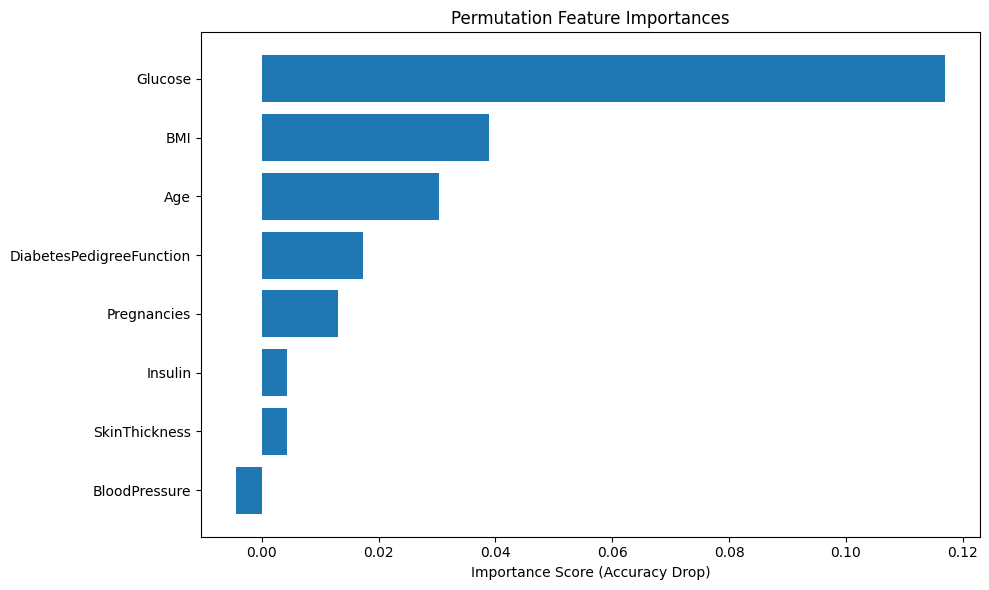

In [34]:
# 3.4: Your code goes here.
importance_df = pd.DataFrame(perm_importances, columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Score (Accuracy Drop)')
plt.title('Permutation Feature Importances')
plt.tight_layout()
plt.show()


3.5 Comments
The permutation importance results show which features the model relies on most. When we shuffled the values of some features like Glucose, the model’s accuracy dropped the most, which means Glucose is very important for predicting diabetes. Other features like BMI and Age also mattered but not as much. These results are similar to that in task 2, but permutation importance is more reliable because it directly shows how much each feature affects predictions.



# Task 4: SHAP (20 points)

In this task, we will use the SHAP (SHapley Additive exPlanations) and the PDP method to explain the output of our trained model. For both methods, you are allowed to use built-in packages.

SHAP is a game-theory-based approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions. PDP (Partial Dependence Plot), on the other hand, shows the marginal effect of a feature on the predicted outcome by averaging over other features.

4.1 – Plot the summary plot of SHAP values in a bar plot and in a violin plot. To do so, use the test set. Report your observations on the obtained plots.

4.2 – Explain the plots in detail and comment on their contents. Also, explain which additional information is provided by using SHAP versus permutation, and what the differences are between the two approaches.

4.3 – Generate a force plot using the SHAP library for the first instance of the test set. Comment on the force plot in a text cell.

4.4 – Calculate SHAP values for the first instance of the test data set and return a table using the `tabulate` library to format the output in a tabular form. The columns should be: feature name, SHAP value, and feature value.

4.5 – Plot a Partial Dependence Plot (PDP) for three of the features in the test set and comment on the three plots.


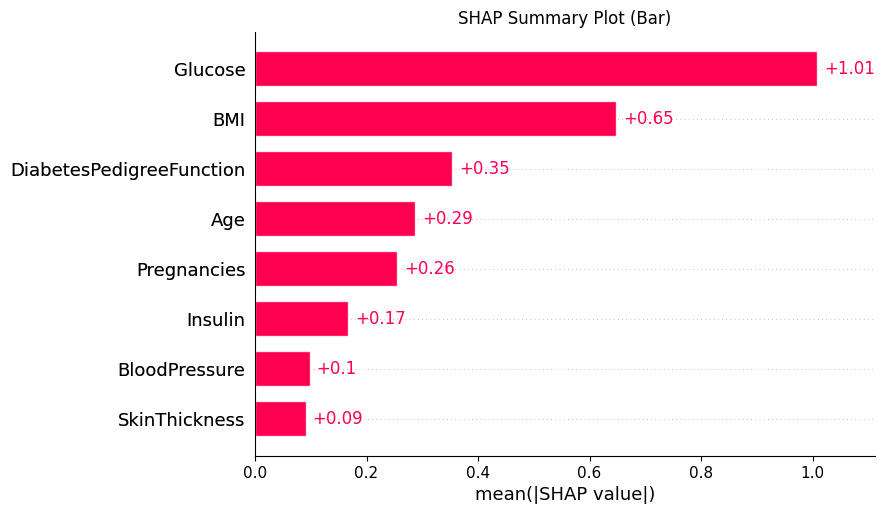

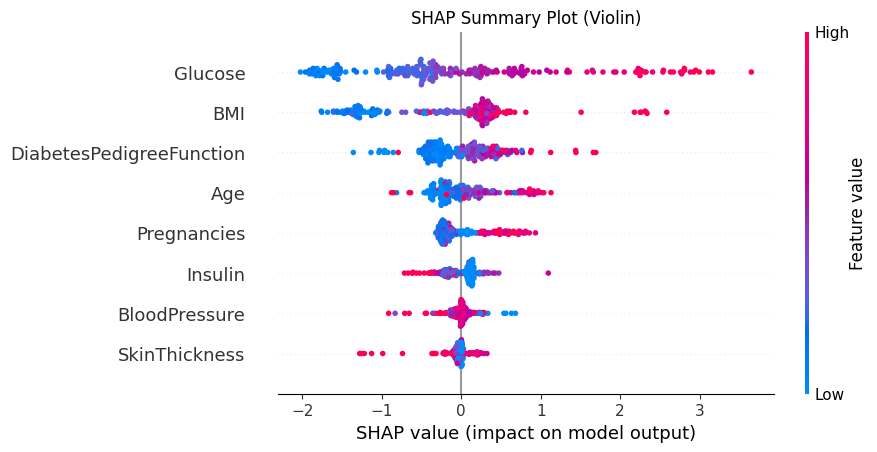

In [35]:
# 4.1) Your code goes here.
import shap
explainer = shap.Explainer(model)

shap_values = explainer(X_test)

plt.title("SHAP Summary Plot (Bar)")
shap.plots.bar(shap_values, show=True)

plt.title("SHAP Summary Plot (Violin)")
shap.plots.beeswarm(shap_values, show=True)


Task 4.2.) Comments

The SHAP bar plot shows which features are most important overall. Glucose is the most important feature, followed by BMI and DiabetesPedigreeFunction. These features have the biggest impact on the model’s predictions.

The violin plot adds more detail. It shows how each feature affects the prediction for each person. For example, when Glucose is high (shown in pink), the model is more likely to predict that the person has diabetes.

Compared to permutation importance, SHAP is better because it shows both how important a feature is and how it changes the prediction (positive or negative). Permutation just tells us how much the model's accuracy drops when a feature is shuffled, but SHAP explains why the model made a certain decision.


In [36]:
# 4.3) Your code goes here.

explainer = shap.Explainer(model, X_train, feature_names=X_train.columns)
shap_values = explainer(X_test, check_additivity=False)
shap.initjs()

shap.force_plot(
    explainer.expected_value,     
    shap_values[0].values,          
    X_test.iloc[0]                 
)



4.3) Comments on the force plot.

The SHAP force plot explains the prediction for one specific patient. The model’s base value starts at around -0.72, and each feature either pushes the prediction higher (red) or lower (blue). For this patient, the prediction was pushed strongly down to -1.93, meaning the model predicts a low chance of diabetes. Features like low BMI, low insulin, and a low DiabetesPedigreeFunction contributed most to lowering the risk. In contrast, higher glucose and age pushed the prediction slightly toward diabetes, but not enough to outweigh the negative contributions. This helps us understand exactly which features influenced the model’s decision for this individual.



In [37]:
# 4.4) Your code goes here.
from tabulate import tabulate

explainer = shap.Explainer(model, X_train)

shap_values = explainer(X_test.iloc[[0]])

feature_names = X_test.columns
feature_values = X_test.iloc[0].values
shap_vals = shap_values.values[0]

table_data = list(zip(feature_names, shap_vals, feature_values))
headers = ["Feature Name", "SHAP Value", "Feature Value"]

print(tabulate(table_data, headers=headers, tablefmt="github"))


| Feature Name             |   SHAP Value |   Feature Value |
|--------------------------|--------------|-----------------|
| Pregnancies              |   -0.176099  |           3     |
| Glucose                  |    0.087092  |         130     |
| BloodPressure            |   -0.0340095 |          78     |
| SkinThickness            |   -0.0836202 |          23     |
| Insulin                  |   -0.251556  |          79     |
| BMI                      |   -0.359357  |          28.4   |
| DiabetesPedigreeFunction |   -0.444953  |           0.323 |
| Age                      |    0.0463235 |          34     |


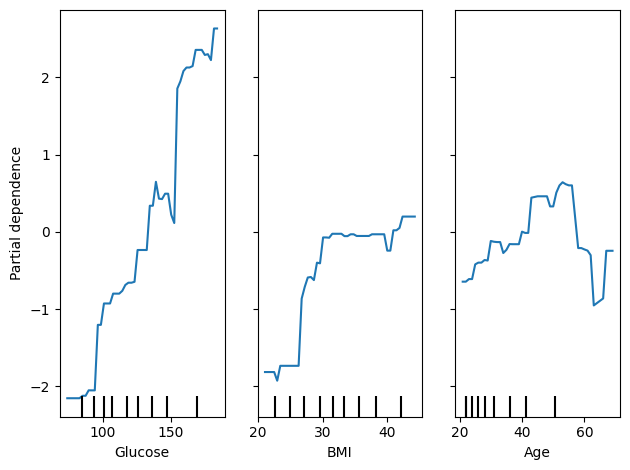

In [38]:
# 4.5) Your code goes here.
from sklearn.inspection import PartialDependenceDisplay

features_to_plot = ['Glucose', 'BMI', 'Age']

PartialDependenceDisplay.from_estimator(model, X_test, features_to_plot, kind='average', grid_resolution=50)
plt.tight_layout()
plt.show()


4.5 Comments on the PDP plots go here:

The PDPs show how each feature individually affects the model’s predictions. For Glucose, the plot shows a strong positive trend where higher glucose levels lead to higher predicted risk of diabetes. This matches what we saw in the SHAP plots, where Glucose was the most important feature. For BMI, we also see a positive relationship, but the effect is smaller. Age has a weaker effect overall, but there's a slight increase in prediction probability as age increases. Overall, the PDP results align well with the SHAP values, reinforcing the importance of Glucose and BMI in predicting diabetes.



# Task 5: Create your own library to calculate Shapley values (20 points)

The shapley value of a feature is the average contribution of a feature value to the prediction. The exact calculation of Shapley values becomes problematic if more features are added, since the computation time grows exponentially. So Strumbelj et al. (2014)  propose an approximation with Monte-Carlo sampling to calculate the Shapley value for the $j$-th feature:

$
\phi_j = \frac{1}{M} \sum_{m=1}^{M} \left( \hat{f}(x_{+j}^m) - \hat{f}(x_{-j}^m) \right)
$

where $\hat{f}(x_{+j}^m)$ is the prediction for $x$, but with a random number of feature values replaced by feature values from a random data point $z$, except for the respective value of feature $j$. (See complete algorithm here: https://www.researchgate.net/publication/271795034_Explaining_prediction_models_and_individual_predictions_with_feature_contributions).


The algorithm approximates Shapley estimation for single feature value. The algorithm ouputs Shapley value for the value of the $j$-th feature in the data set.

To use the algorithm, we need to specify: 1) number of iterations $M$, 2) instance of interest $x$, 3) feature index $j$, 4) data matrix $X$, and 5) machine learning model $f$.

For all $m=1, \ldots, M$:

1. Draw random instance $z$ from the data matrix $X$
2. Pick a random subset of feature column indices $o$ (with $j$ not in $o$).
3. Construct two new instances:
   - With $j$ from $x$: $x_{+j}$, where all values in $x$ with index in $o$ are replaced by the respective values in $z$.
   - Without $j$ from $x$: $x_{-j}$, where all values in $x$ with index in $o$ are replaced by the respective values in $z$ and also the value for $j$ is replaced by the value in $z$.
4. Compute marginal contribution: $\phi_j^m = \hat{f}(x_{+j}) - \hat{f}(x_{-j})$
5. Compute Shapley value as the average: $\phi_j(x) = \frac{1}{M} \sum_{m=1}^{M} \phi_j^m$


## Your Task

5.1 - Train a LogisticRegression classifier using the training data used in task 1.

5.2 -  Write a function to approximate the Shapley values for a specific feature (j) for a specific observation (x) from the test set.
Use Monte Carlo sampling with $M$ iterations. Follow the Strumbelj's algorithm to construct the Monte Carlo sampling process and calculate the Shapley value approximation. The function should return the calculated Shapley value approximation for the feature $j$, for a specific observation (x) in the test set. You are free to choose the values of M, $j$, and $x$.

5.3 - Use the function to predict the Shapley value for a specific feature (j) for a specific observation (x) from the test set. Compare the result with that obtained using the built-in function. (**Expectation**: the output of the built-in function should be **very close** (+/- 0.01) to the output of your function).

In [ ]:
# 5.1 ) Your code goes below

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

train_acc = logreg_model.score(X_train, y_train)
print(f"Logistic Regression Training Accuracy: {train_acc:.4f}")



Logistic Regression Training Accuracy: 0.7914


In [ ]:
# 5.2 and 5.3 ) Your code goes below

def approximate_shapley(model, X_data, x, feature_idx, M=5000):
    np.random.seed(42)
    shapley_vals = []
    num_features = X_data.shape[1]

    for m in range(M):
        z = X_data.iloc[np.random.choice(len(X_data))].values

        other_indices = [i for i in range(num_features) if i != feature_idx]
        subset_size = np.random.randint(0, len(other_indices) + 1)
        o_indices = np.random.choice(other_indices, size=subset_size, replace=False)

        x_plus = x.copy()
        x_minus = x.copy()
        x_plus[o_indices] = z[o_indices]
        x_minus[o_indices] = z[o_indices]
        x_minus[feature_idx] = z[feature_idx]

        pred_plus = model.predict_proba(x_plus.reshape(1, -1))[0][1]
        pred_minus = model.predict_proba(x_minus.reshape(1, -1))[0][1]
        shapley_vals.append(pred_plus - pred_minus)
        
    return np.mean(shapley_vals)



In [15]:
##  Your code goes here
sample_idx = 0
feature_idx = 1  #glucose

x_sample = X_test.iloc[sample_idx].values

my_shap_value = approximate_shapley(logreg_model, X_train, x_sample, feature_idx, M=5000)

explainer = shap.Explainer(logreg_model, X_train)
shap_values = explainer(X_test)

print(f"Shapley value for feature j with my implementation is -->: {my_shap_value:.5f}")
print(f"Shapley value for feature j with built-in function is -->: {shap_values.values[sample_idx][feature_idx]:.5f}")


Shapley value for feature j with my implementation is -->: 0.02410
Shapley value for feature j with built-in function is -->: 0.33619


## Task 6 (Bonus): Image Interpretability Analysis using Occlusion Sensitivity Method (10 points)

Occlusion is a perturbation-based approach to computing attribution. It consists of replacing each contiguous rectangular region with a given baseline/reference and calculating how that replacement in the input affects the output.

In this task, you will explore the interpretability of a convolutional neural network (CNN) model's predictions on image data. Specifically, you will employ the occlusion sensitivity method to analyze the importance of different regions within an image towards the model's predictions.

**Your tasks:**

6.1- Load a pre-trained model for image classification (https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/). You can choose models like VGG, ResNet, etc.

6.2 - Select and load an image suitable for image classification tasks. You can consider using an image of the ImageNet data set or any other dataset relevant to your domain of interest. Make sure the image you select is within the classes the model saw during training.

6.3 - Preprocess the selected image, ensuring that images are appropriately formatted and labeled for the model you are using.

6.4 - Define a function named *occlusion* that returns a heatmap indicating the importance of each image region for the target class prediction. The idea is occluding parts of the image and then calculate its probability of belonging to the target class. A heatmap reprents the occlusion sensitivity scores.

6.5 - Testing: Load the image you decided to use. Call the occlusion function with the loaded model, image, and target label. Visualize the heatmap using a heatmap visualization library.

6.6 - Comment on your results in a separate text cell.

Overall, this task is meant for you to identify the components of the image that contribute the most to the model's prediction that the image belongs to a specific class.

In [16]:
## Your code goes here

# 6.1 Load a model
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO

model = models.resnet18(pretrained=True)
model.eval()

/home/en520-twong53/.conda/envs/mlma2025/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/en520-twong53/.conda/envs/mlma2025/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [19]:
## Your code goes here
import cv2


# 6.2 Load an image
image_path = '/home/en520-twong53/scr4-en520-lmorove1/en520-twong53/lab8/dog.jpg'
image = Image.open(image_path).convert('RGB')
# 6.3 Pre-process the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]  
    )
])
input_tensor = transform(image).unsqueeze(0)

with torch.no_grad():
    output = model(input_tensor)
    pred_class = output.argmax(dim=1).item()

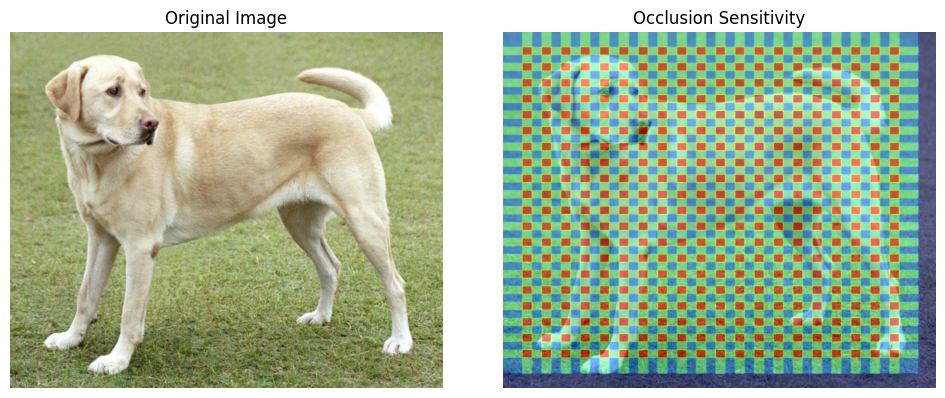

In [20]:
# 6.4 Define a function named occlusion
def occlusion(model, image_tensor, target_class, patch_size=15, stride=10):
    _, C, H, W = image_tensor.shape
    heatmap = torch.zeros((H, W))
    baseline = image_tensor.clone()

    for y in range(0, H - patch_size + 1, stride):
        for x in range(0, W - patch_size + 1, stride):
            occluded = image_tensor.clone()
            occluded[:, :, y:y+patch_size, x:x+patch_size] = 0

            with torch.no_grad():
                score = model(occluded)[0, target_class].item()

            heatmap[y:y+patch_size, x:x+patch_size] += score

    heatmap = heatmap.numpy()
    heatmap -= heatmap.min()
    heatmap /= heatmap.max()
    return heatmap
# 6.5 Test your function
heatmap = occlusion(model, input_tensor, pred_class)

# 6.5 Visualization
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
resized_heatmap = cv2.resize(heatmap, (image.width, image.height))
plt.imshow(image)
plt.imshow(resized_heatmap, cmap='jet', alpha=0.5)
plt.title("Occlusion Sensitivity")
plt.axis('off')

plt.tight_layout()
plt.show()

6.6 Comment on your results.

The occlusion sensitivity heatmap shows which parts of the image are most important for the model’s prediction. In this case, the model is trying to recognize a dog, and we can see that covering parts like the dog’s head, face, and body makes the model less confident. These areas show up as red and yellow on the heatmap, meaning they’re very important.

On the other hand, when parts like the background or tail are covered, it doesn’t affect the model’s prediction much. These areas show up as blue, meaning they’re not very important.

This result makes sense as the model is paying attention to the right parts of the image, mainly the dog, instead of things that don’t matter, like the grass. So, the heatmap helps confirm that the model is making smart and meaningful decisions based on what it sees.